<a href="https://colab.research.google.com/github/Sedighe-Raeisi/Link-Prediction-with-Pytorch-GCN/blob/main/LinkPrediction_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dependencies 

In [1]:
!pip install torch_geometric
!pip install torch_sparse
!pip install torch_scatter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 467 kB 8.2 MB/s 
  Created wheel for torch-geometric: filename=torch_geometric-2.1.0.post1-py3-none-any.whl size=689859 sha256=7d2f3f6ae84dfc1b9677995ea3d96291acecc88569206b07cfae1f4e59fb08b9
  Stored in directory: /root/.cache/pip/wheels/d1/cb/43/f7f2e472de4d7cff31bceddadc36d634e1e545fbc17961c282
Successfully built torch-geometric
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 8.4 MB/s 
  Created wheel for torch-sparse: filename=torch_sparse-0.6.15-cp37-cp37m-linux_x86_64.whl size=516860 sha256=710de337cc5ad105081e34cc96d75dcc956b293b76fd001a7e52749318981591
  Stored in directory: /root/.cache/pip/wheels/15/68/4d/1414be5c2c622bad35364e13213180797717b6d4b8923936dc
Successfully built torch-sparse
Looking in indexes: https://pypi.org/simple, https://us-p

In [2]:
from torch.nn import Linear 
from torch_geometric.nn import GCNConv
from torch.nn import Module
import torch
import torch.nn.functional as F
import numpy as np
import networkx as nx
from torch_geometric.utils import from_networkx
from torch_geometric.utils  import to_networkx
from torch_geometric.transforms import RandomLinkSplit

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from matplotlib import rc

In [ ]:
from matplotlib.pyplot import Circle
from matplotlib.animation import FuncAnimation

In [3]:
G=nx.karate_club_graph()


In [4]:
g=nx.Graph(G.edges)

In [5]:
G_data=from_networkx(g)

In [6]:
G_data

Data(edge_index=[2, 156], num_nodes=34)

In [7]:
embed_size=5
embed = torch.nn.Embedding(34, embed_size)
X=embed.weight
X=X.requires_grad_(True)
data=G_data

In [8]:
data

Data(edge_index=[2, 156], num_nodes=34)

In [9]:
all_edges=list(to_networkx(data).edges)

In [10]:
transform = RandomLinkSplit(is_undirected=True,num_val=0,num_test=.2)
train_data, val_data, test_data = transform(data)

In [11]:
pos_edge_index=[]
for i in range(train_data.edge_label_index.size()[1]):
  if int(train_data['edge_label'][i].item())==1:
    pos_edge_index+=[(train_data['edge_label_index'][0][i].item(),train_data['edge_label_index'][1][i].item())]
pos_edge_index=torch.tensor( pos_edge_index, dtype=torch.long).t().contiguous()


Generating node positions for visualization of graph

In [ ]:
import random
pos_list=[(0,.5)]+[(random.uniform(0.1, 1.9), random.uniform(0.0, 1)) for i in range(1,33)]+[(2,.5)]
node_list=[i for i in range(34)]
pos=dict(zip(node_list,pos_list))

#Analysis of train and test data

In [ ]:
train_data

Data(edge_index=[2, 126], num_nodes=34, edge_label=[126], edge_label_index=[2, 126])

Edges with label=0 do not exist in the original graphs. But Edges with label=1 exist in original graph.

In [ ]:
train_data.edge_label

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [140]:
edge_labels=dict()
edge_color=[]
for i in range(126):

  edge_labels[(train_data['edge_label_index'][0][i].item(),train_data['edge_label_index'][1][i].item())]=int(train_data['edge_label'][i].item())
edge_color=['red' if j==1 else 'gray' for i,j in edge_labels.items()]
train_edges_list=[i for i,j in edge_labels.items() if j==1 ]

n=0
m=0
edge_color=[]
for i,j in edge_labels.items():
  if j==0:
    n+=1
    edge_color+=['pink']
  elif j==1:
    m+=1
    edge_color+=['black']
print(f'labels=0---> {n}  and labels=1---> {m}')

labels=0---> 63  and labels=1---> 63


In [141]:
G=nx.Graph()
G.add_nodes_from([i for i in range(34)])
G.add_edges_from(dict(edge_labels))

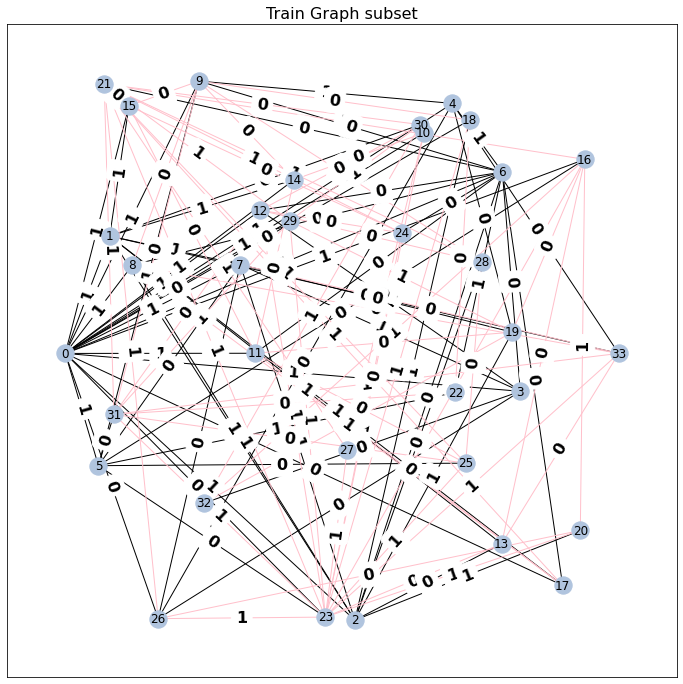

In [142]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.title('Train Graph subset',fontdict={'size':16})
nx.draw_networkx(G,pos=pos,edge_color=edge_color,node_color='lightsteelblue')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.5,
                             font_color='black', font_size=16, font_weight='bold' )
plt.show()

###Test Data

In [134]:
edge_labels=dict()
edge_color=[]
for i in range(30):

  edge_labels[(test_data['edge_label_index'][0][i].item(),test_data['edge_label_index'][1][i].item())]=int(test_data['edge_label'][i].item())
edge_color=['red' if j==1 else  'gray' for i,j in edge_labels.items()]
test_edges_list=[i for i,j in edge_labels.items() if j==1 ]

n=0
m=0
edge_color=[]
for i,j in edge_labels.items():
  if j==0:
    n+=1
    edge_color+=['pink']
  elif j==1:
    m+=1
    edge_color+=['black']
print(f'labels=0---> {n}  and labels=1---> {m}')

labels=0---> 15  and labels=1---> 15


Do not use "to_networkx" . it doesn't work as we wish. It contain all edges of data but labels are not correct for it.  

In [135]:
G=nx.Graph()
G.add_nodes_from([i for i in range(34)])
G.add_edges_from(dict(edge_labels))

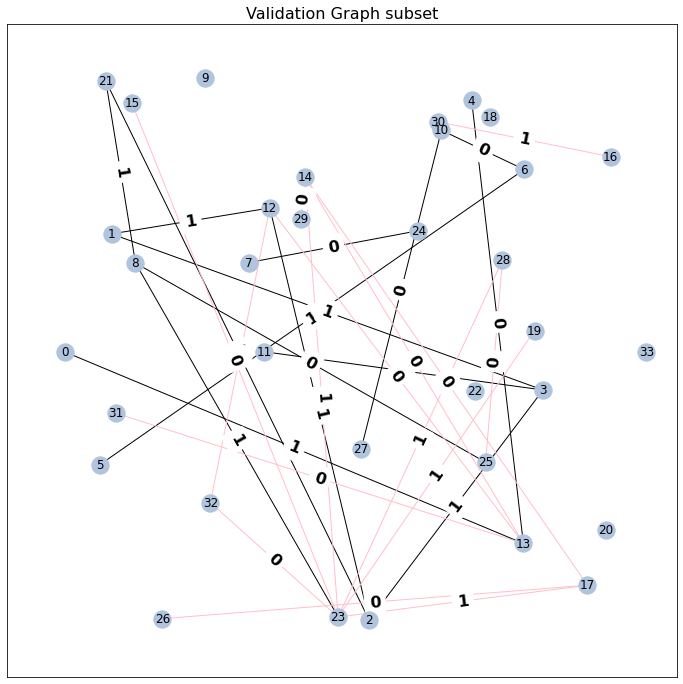

In [139]:
plt.figure(figsize=(12,12))
plt.title('Validation Graph subset',fontdict={'size':16})
nx.draw_networkx(G,pos=pos,edge_color=edge_color,node_color='lightsteelblue')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.5,
                             font_color='black', font_size=16, font_weight='bold' )
plt.show()

Let's see how edges are splitted. As we see there are esdges which does not present in neither of test and train split. 

In [ ]:
all=all_edges.copy()
print(len(all))
for i in train_edges_list:
  all.remove(i)
print(f'all-train={len(all_edges)}-{len(train_edges_list)}={len(all)}')
for i in test_edges_list:
  all.remove(i)
print(f'all-train-test={len(all_edges)}-{len(train_edges_list)}-{len(test_edges_list)}-={len(all)}')

156
all-train=156-63=93
all-train-test=156-63-15-=78


#Model 2

In [13]:
class Net2(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.GCN1 = GCNConv(in_channels, hidden_channels)
        self.GCN2 = GCNConv(hidden_channels, out_channels)
        self.lin  = torch.nn.Linear(out_channels*2,1)

    def encode(self, x, edge_index):
        # Deriving the node embeddings
          x=self.GCN1(x,edge_index)
          x=torch.relu(x)
          x=self.GCN2(x,edge_index)
          return x

    def decode(self, z, edge_label_index):
        
        return self.lin(torch.cat([z[edge_label_index[0]] , z[edge_label_index[1]]],dim = -1))

In [14]:
model=Net2(embed_size,5,2)

In [15]:
from itertools import chain
optimizer=torch.optim.Adam(chain(model.parameters(),embed.parameters()))

In [16]:
criterion = torch.nn.BCEWithLogitsLoss()

In [17]:

trainloss_list=[]
trainacc_list=[]
AllPredTrain=[]

testloss_list=[]
testacc_list=[]
AllPredTest=[]

T_epochs=601
for epochs in range(T_epochs):  
  
  edge_index=pos_edge_index# We can only use present edges (which are labeld as 1) in train data for node embedding. 
  z=model.encode(X,edge_index)

  #------------TRAIN-------------

  pred_edge_label = model.decode(z, train_data.edge_label_index).view(-1)
  loss = criterion(pred_edge_label, train_data.edge_label)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  trainloss_list.append(loss.item())

  acc=((pred_edge_label .sigmoid().round().int()) == train_data.edge_label.int()).float().mean().item()
  trainacc_list+=[acc]


  trainlabels=list((pred_edge_label.sigmoid().round().int()))
  trainindex=[(train_data['edge_label_index'][0][i].item(),train_data['edge_label_index'][1][i].item()) for i in range(train_data.edge_label_index.size()[1])]
  AllPredTrain+=[dict(zip(trainindex,trainlabels))]

  #------------TEST-------------

  pred_edge_label = model.decode(z, test_data.edge_label_index).view(-1)
  
  test_loss = criterion(pred_edge_label, test_data.edge_label)

  testloss_list.append(test_loss.item())

  test_acc=((pred_edge_label .sigmoid().round().int()) == test_data.edge_label.int()).float().mean().item()
  testacc_list+=[test_acc]

  #For prepairing the animation we save pred labels of each epoch
  testlabels=list((pred_edge_label .sigmoid().round().int()))
  testindex=[(test_data['edge_label_index'][0][i].item(),test_data['edge_label_index'][1][i].item()) for i in range(test_data.edge_label_index.size()[1])]
  AllPredTest+=[dict(zip(testindex,testlabels))]

 
  if epochs%20==0 or epochs==T_epochs-1:
    print(f'epochs={epochs} , train_acc={acc} , test_acc={test_acc}')
    print('--------------------------------------------------------')

epochs=0 , train_acc=0.5317460298538208 , test_acc=0.6000000238418579
--------------------------------------------------------
epochs=20 , train_acc=0.5396825671195984 , test_acc=0.6333333253860474
--------------------------------------------------------
epochs=40 , train_acc=0.5714285969734192 , test_acc=0.699999988079071
--------------------------------------------------------
epochs=60 , train_acc=0.6269841194152832 , test_acc=0.699999988079071
--------------------------------------------------------
epochs=80 , train_acc=0.6507936716079712 , test_acc=0.7666666507720947
--------------------------------------------------------
epochs=100 , train_acc=0.6507936716079712 , test_acc=0.7333333492279053
--------------------------------------------------------
epochs=120 , train_acc=0.658730149269104 , test_acc=0.7333333492279053
--------------------------------------------------------
epochs=140 , train_acc=0.6666666865348816 , test_acc=0.7333333492279053
----------------------------------

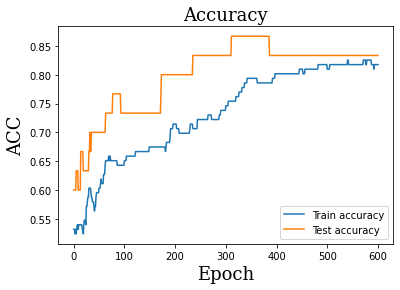

In [18]:
import matplotlib.pyplot as plt

font_dict={'family':'serif','size':18}
plt.plot(trainacc_list,'-',label='Train accuracy');
plt.plot(testacc_list,'-',label='Test accuracy');

plt.xlabel('Epoch',fontdict=font_dict)
plt.ylabel('ACC', fontdict=font_dict)
plt.title('Accuracy', fontdict=font_dict)
plt.legend(loc='lower right');


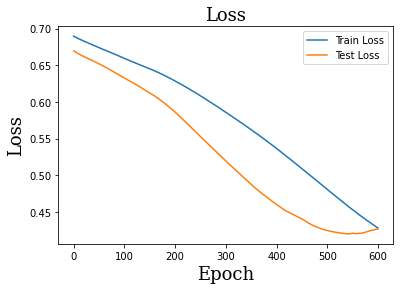

In [53]:
import matplotlib.pyplot as plt

font_dict={'family':'serif','size':18}
plt.plot(trainloss_list,'-',label='Train Loss');
plt.plot(testloss_list,'-',label='Test Loss');

plt.xlabel('Epoch',fontdict=font_dict)
plt.ylabel('Loss', fontdict=font_dict)
plt.title('Loss', fontdict=font_dict)
plt.legend(loc='upper right');

#Saving the results

Saving

In [61]:
import pickle
path='/content/drive/MyDrive/MachineLearing/GNN/Link_Prediction/'

Save_staff=[trainloss_list,trainacc_list,AllPredTrain,testloss_list,testacc_list,AllPredTest]
Save_staff_name=['trainloss_list','trainacc_list','AllPredTrain','testloss_list','testacc_list','AllPredTest']



for i in range(len(Save_staff)):
  with open(path+Save_staff_name[i], "wb") as fp:   #Pickling
    pickle.dump(Save_staff[i], fp)


Loading

In [ ]:
Save_staff=[trainloss_list,trainacc_list,AllPredTrain,testloss_list,testacc_list,AllPredTest]
for i in range(len(Save_staff)):
  with open(path+Save_staff_name[i], "rb") as fp: # Unpickling
    Save_staff[i] = pickle.load(fp)

#Test Animation

In [64]:
rc('animation', html='jshtml')

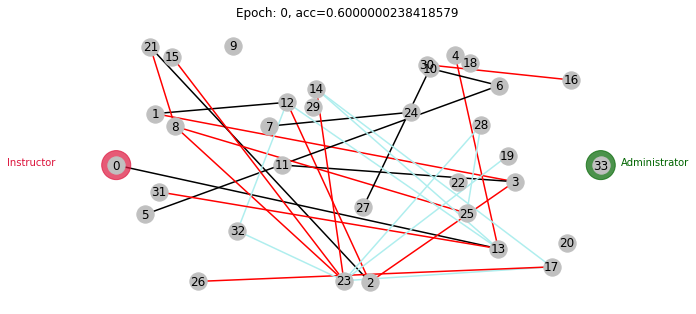

In [131]:

fig, ax = plt.subplots(figsize=(10, 6))

def update(i):
  i=int(i)
  edge_labels=AllPredTest[i]
  G=nx.Graph()
  G.add_nodes_from([i for i in range(34)])
  G.add_edges_from(dict(edge_labels))
  plt.cla()
  ax. set_aspect('equal')
  ax.axis('off')
  ax.set_title(f'Epoch: {i}, acc={testacc_list[i]}')
  
  edge_color=[]
  
  P_label=list(edge_labels.values())
  T_label=list(test_data.edge_label.detach().numpy().astype(int))
  for jj in range(len(P_label)):
    if P_label[jj]==T_label[jj] and P_label[jj]==0:
      edge_color+=['paleturquoise']
    elif P_label[jj]==T_label[jj] and P_label[jj]==1:
      edge_color+=['black']
    elif P_label[jj]!=T_label[jj]:
      edge_color+=['red']

  nx.draw_networkx(G,pos=pos,edge_color=edge_color,width=1.5,node_color='silver')

  ax.add_patch(plt.Circle((0,.5), 0.06, color='crimson',alpha=0.7))
  ax.add_patch(plt.Circle((2,.5), 0.06, color='darkgreen',alpha=.7))

  ax.text(-.45,.5,'Instructor',fontdict={'color':'crimson'})
  ax.text(2.085,.5,'Administrator',fontdict={'color':'darkgreen'})
  
ani = FuncAnimation(fig, func = update, frames=np.arange(0,360,T_epochs/20),interval=700, repeat=False)
display(ani)


#Save the model

In [36]:
PATH='/content/drive/MyDrive/MachineLearing/GNN/Link_Prediction/model_scripted.pt'

In [37]:
torch.save(model, PATH)

Load the Model

In [38]:
model_n = torch.load(PATH)
model_n.eval()

Net2(
  (GCN1): GCNConv(5, 5)
  (GCN2): GCNConv(5, 2)
  (lin): Linear(in_features=4, out_features=1, bias=True)
)

In [42]:

edge_index=pos_edge_index 
z=model_n.encode(X,edge_index)

pred_edge_label = model_n.decode(z, test_data.edge_label_index).view(-1)
  
testlabels=list((pred_edge_label .sigmoid().round().int()))

test_acc=((pred_edge_label .sigmoid().round().int()) == test_data.edge_label.int()).float().mean().item()
print(f'test accuracy={test_acc}')




test accuracy=0.8333333134651184
